In [1]:
import cv2,os

data_path='Vedic dataset'

In [2]:
categories=os.listdir(data_path)

In [3]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'Vedic symbols': 0, 'Vedic worshipping  device': 1}
['Vedic symbols', 'Vedic worshipping  device']
[0, 1]


In [4]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)


In [5]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [8]:
target.shape, data.shape  #category in target#

((3389, 2), (3389, 100, 100, 1))

In [9]:
target[1]

array([1., 0.], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.6))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [12]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=12,callbacks=[checkpoint],validation_split=0.2)


Epoch 1/12
77/77 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.5734WARNING:tensorflow:From /home/shreyash/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
77/77 [==============================] - 80s 1s/step - loss: 0.6824 - accuracy: 0.5734 - val_loss: 0.5980 - val_accuracy: 0.6082
Epoch 2/12
77/77 [==============================] - 84s 1s/step - loss: 0.5622 - accuracy: 0.6746 - val_loss: 0.5264 - val_accuracy: 0.7082
Epoch 3/12
77/77 [==============================] - 83s 1s/step - loss: 0.4922 - accuracy: 0.7

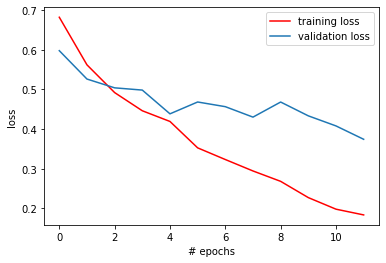

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [14]:
print(model.evaluate(test_data,test_target))

11/11 [==============================] - 2s 224ms/step - loss: 0.2795 - accuracy: 0.8820
[0.2795223295688629, 0.8820058703422546]


In [16]:
import pickle

In [17]:
with open('data_path_pickle.pkl', 'wb') as file:
    pickle.dump(data_path,file)

In [18]:
with open('data_path_pickle.pkl','rb') as f:
    jp = pickle.load(f)